In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import warnings 
warnings.filterwarnings('ignore')

**Data Prepration**

In [2]:
df = pd.read_csv('train.csv')
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [3]:
df.shape

(1000, 12)

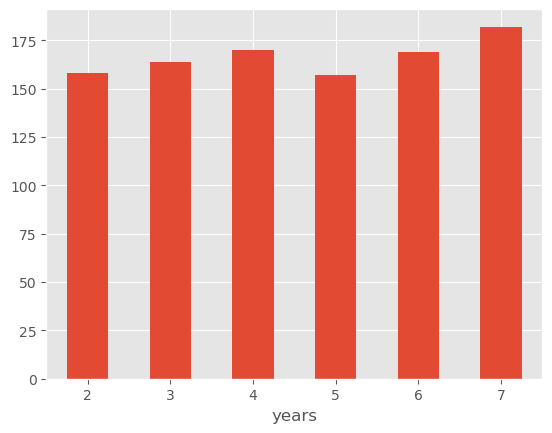

In [4]:
plt.style.use('ggplot')
x = df['years'].value_counts().sort_index(ascending=True)
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

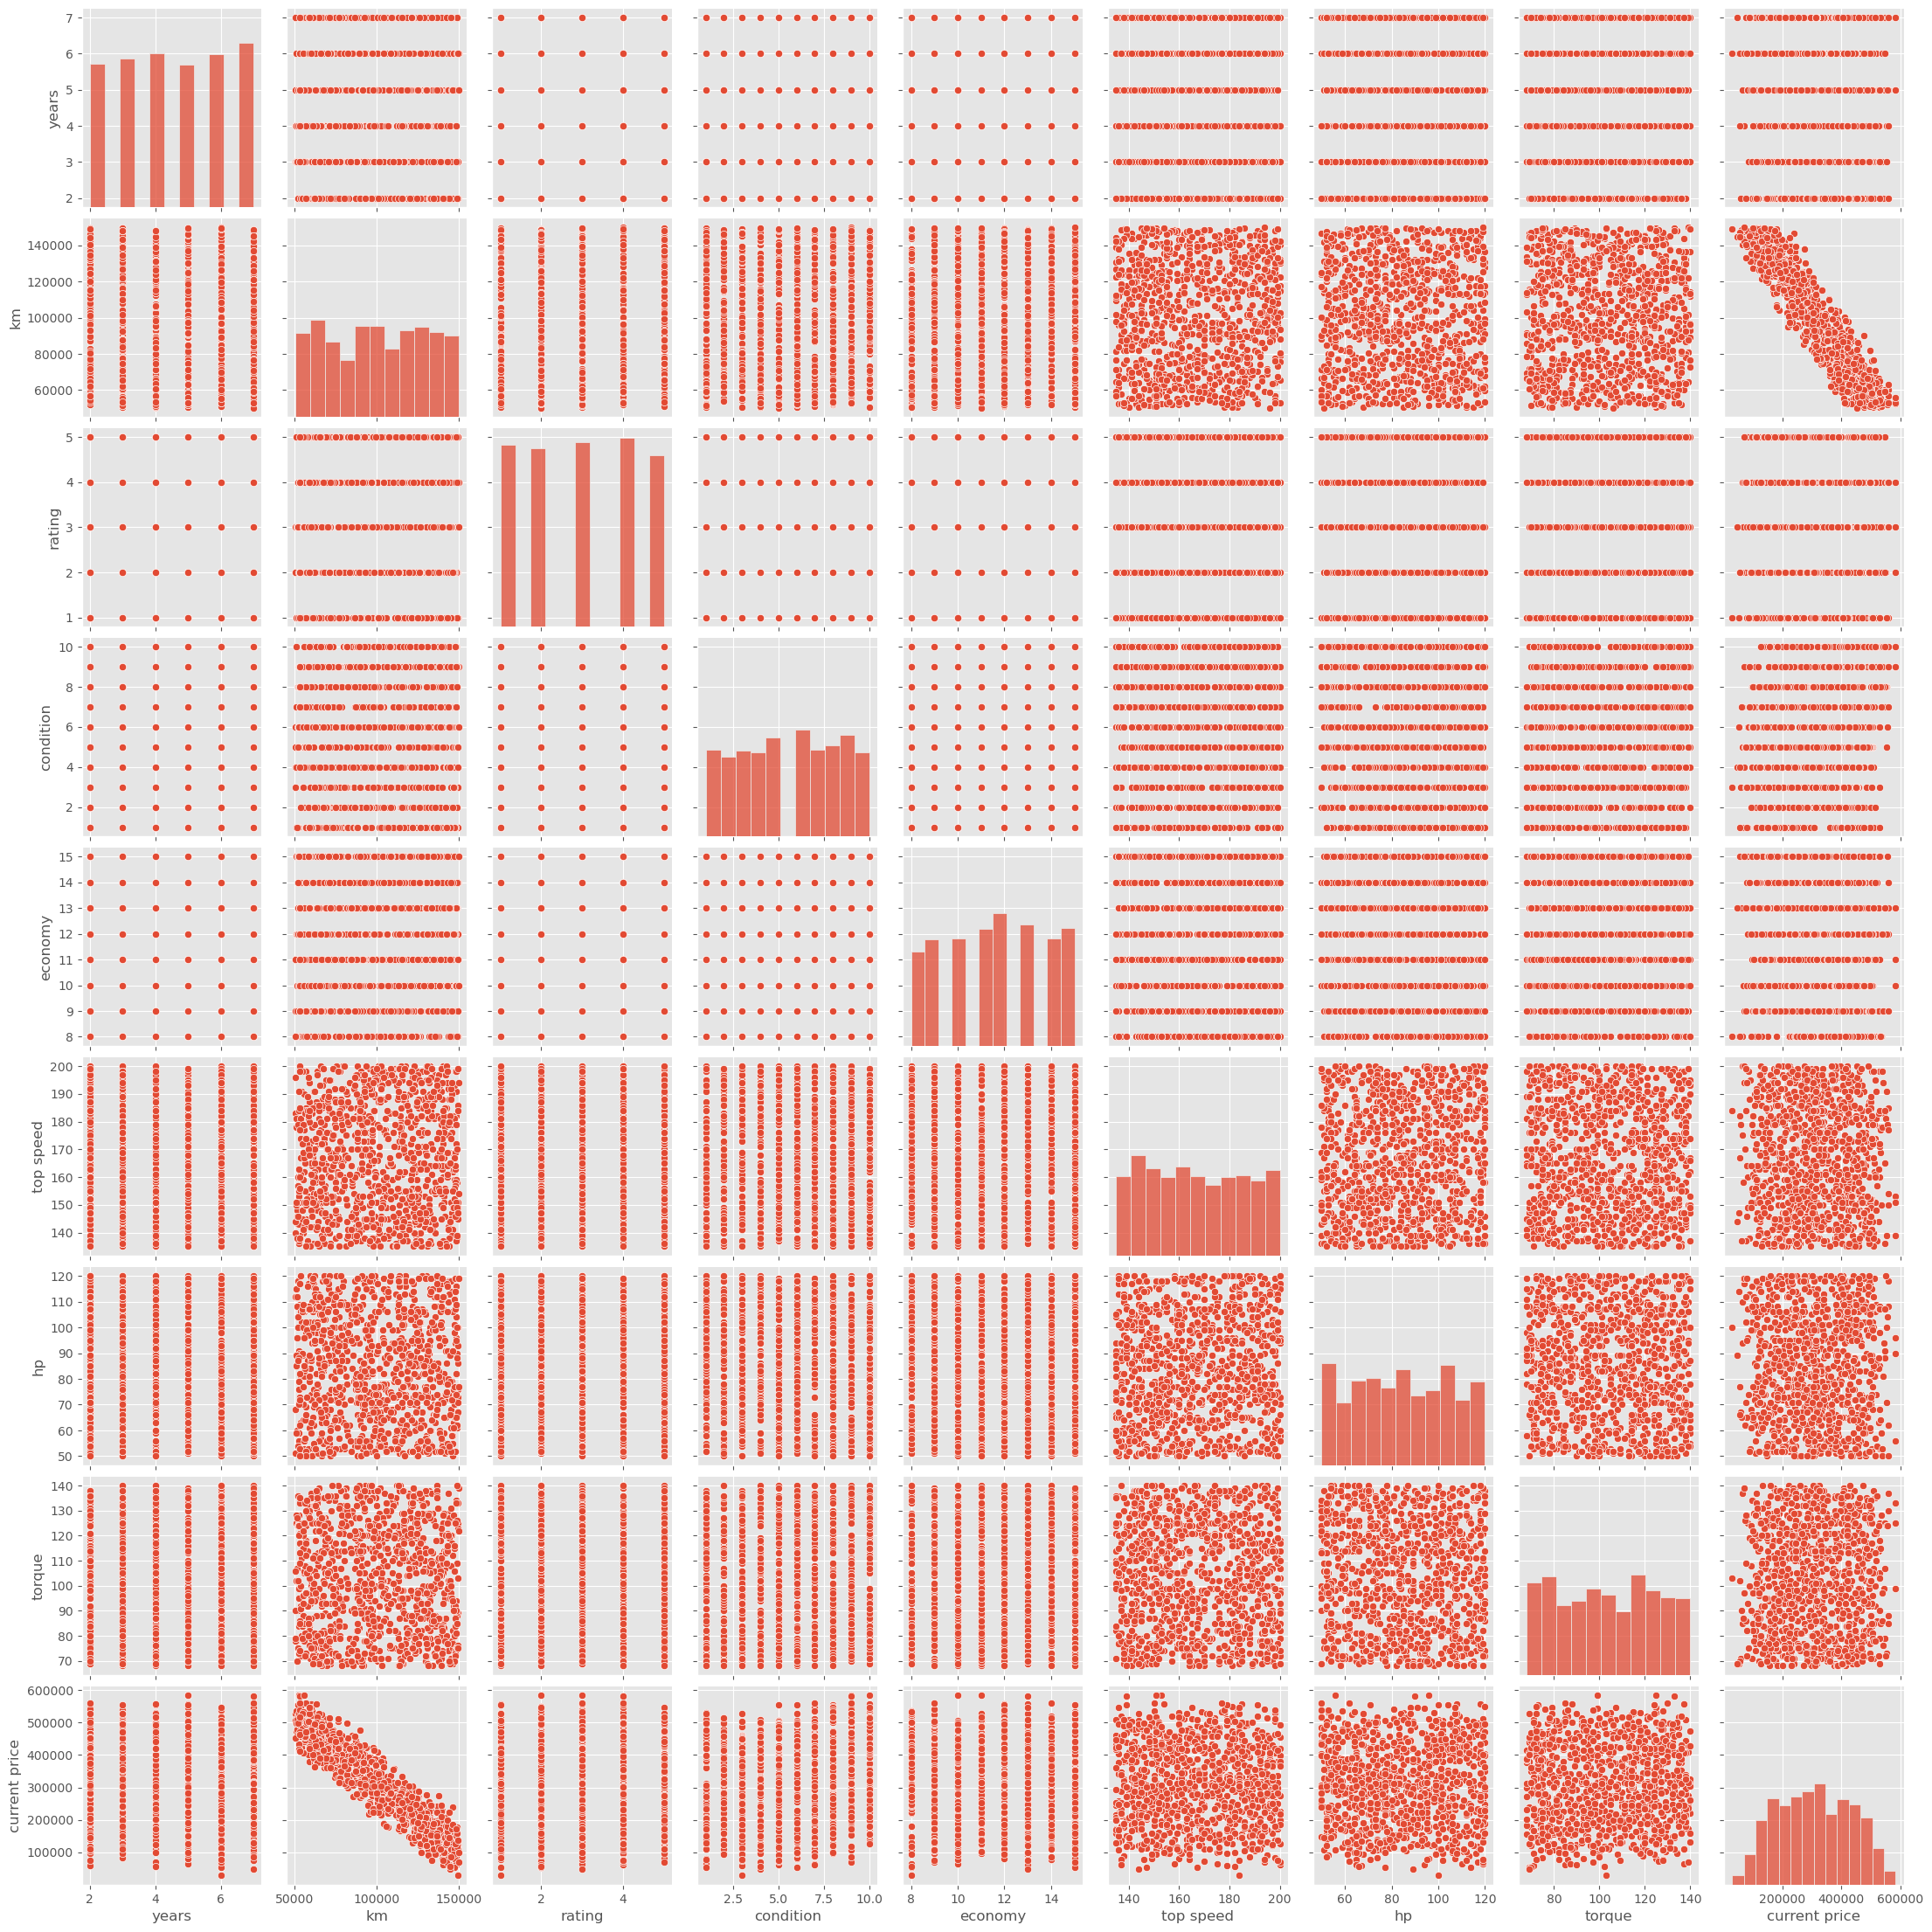

In [5]:
sns.pairplot(df[['years', 'km', 'rating','condition', 'economy', 'top speed', 'hp', 'torque', 'current price']])

In [29]:
tensor_data = tf.compat.v1.constant(df)
tensor_data = tf.compat.v1.cast(df,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [30]:
tensor_data = tf.random.shuffle(df)
print(tensor_data[:5])

tf.Tensor(
[[4.170000e+02 6.354870e+05 8.174840e+05 5.000000e+00 7.680500e+04
  2.000000e+00 1.000000e+00 9.000000e+00 1.350000e+02 1.040000e+02
  1.210000e+02 4.179400e+05]
 [8.630000e+02 6.282000e+05 7.809490e+05 4.000000e+00 1.075490e+05
  4.000000e+00 2.000000e+00 1.400000e+01 1.410000e+02 9.200000e+01
  8.200000e+01 2.746500e+05]
 [1.500000e+01 5.029320e+05 8.743870e+05 7.000000e+00 5.154700e+04
  2.000000e+00 1.000000e+00 9.000000e+00 1.460000e+02 6.000000e+01
  1.070000e+02 4.742815e+05]
 [5.750000e+02 5.456690e+05 7.182010e+05 7.000000e+00 9.572800e+04
  4.000000e+00 7.000000e+00 1.100000e+01 1.990000e+02 6.400000e+01
  7.700000e+01 2.497655e+05]
 [2.460000e+02 6.189880e+05 8.048590e+05 5.000000e+00 1.255140e+05
  3.000000e+00 1.000000e+01 1.300000e+01 1.690000e+02 1.190000e+02
  7.400000e+01 2.586920e+05]], shape=(5, 12), dtype=float64)


In [31]:
X = tensor_data[:,3:-1]
print(X.shape[:5])

(1000, 8)


In [32]:
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=-1)
print(y[:5])

tf.Tensor(
[[417940. ]
 [274650. ]
 [474281.5]
 [249765.5]
 [258692. ]], shape=(5, 1), dtype=float64)


In [26]:
# normalize = tf.keras.layers.Normalization(mean=5,variance=4)
# x = tf.compat.v1.constant([[4,3,2,9,5],
#                           [3,6,4,8,7]])
# normalize(x)

In [34]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [35]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [38]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [59]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [40]:
normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)
normalize(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.25611746, -0.8111987 , -0.7020757 , -1.6362083 , -1.1743644 ,
        -1.6354434 ,  0.9750012 ,  0.8257502 ],
       [-0.32596698,  0.23960385,  0.7289076 , -1.2808005 ,  1.0561467 ,
        -1.3223147 ,  0.3866916 , -1.0015699 ],
       [ 1.4202863 , -1.6744947 , -0.7020757 , -1.6362083 , -1.1743644 ,
        -1.0613741 , -1.182134  ,  0.16978914],
       [ 1.4202863 , -0.16442743,  0.7289076 ,  0.49623835, -0.28215995,
         1.7045965 , -0.9860308 , -1.2358416 ],
       [ 0.25611746,  0.85363156,  0.01341595,  1.5624617 ,  0.6100445 ,
         0.13895279,  1.7103883 , -1.3764046 ]], dtype=float32)>

In [83]:
model = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(8,)),
                               normalize,
                               tf.keras.layers.Dense(128 , activation='relu'),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dense(1, activation='relu')
    
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 128)               1152      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

In [82]:
# model = tf.keras.Sequential()
# model.add(normalize)
# model.add(keras.layers.Dense(1))
# model.summary()

**Losses And Model Compile**

In [84]:
model.compile(optimizer=Adam(learning_rate=1),
             loss=MeanAbsoluteError(),
             metrics=RootMeanSquaredError())

In [85]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val) ,epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 4s 32ms/step - loss: 296695.3750 - root_mean_squared_error: 325489.7188 - val_loss: 269156.8125 - val_root_mean_squared_error: 307129.8438
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 137168.3906 - root_mean_squared_error: 199128.5781 - val_loss: 66869.6172 - val_root_mean_squared_error: 80850.8203
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 65794.7031 - root_mean_squared_error: 82874.9219 - val_loss: 50303.9688 - val_root_mean_squared_error: 63192.0742
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 49949.1914 - root_mean_squared_error: 61386.8711 - val_loss: 54825.2266 - val_root_mean_squared_error: 69099.8047
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 54465.4883 - root_mean_squared_error: 67043.4531 - val_loss: 56349.7109 - val_root_mean_squared_error: 68535.4453
Epoch 6/100
25/25 [==============================] - 0s 7m

In [86]:
model.evaluate(X_val,y_val)

4/4 [==============================] - 0s 5ms/step - loss: 46452.2812 - root_mean_squared_error: 55712.4102


[46452.28125, 55712.41015625]

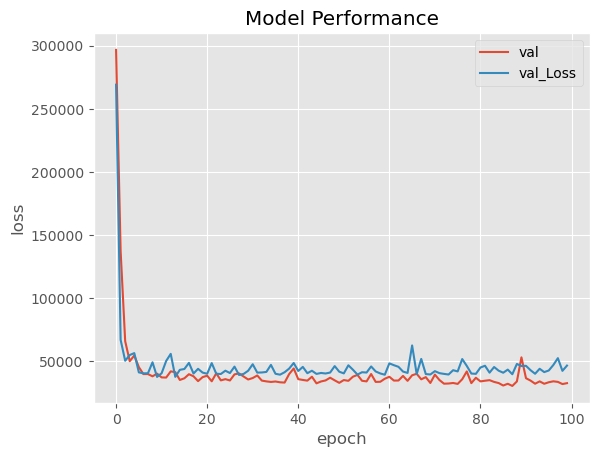

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['val','val_Loss'])
plt.show()

Text(0, 0.5, 'loss')

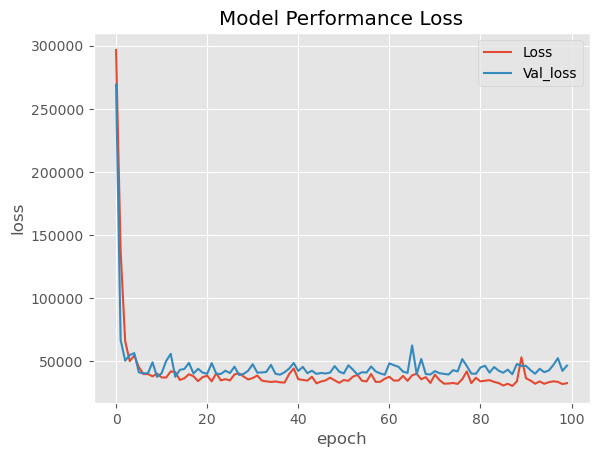

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance Loss')
plt.legend(['Loss','Val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [44]:
history.history

{'loss': [304170.15625,
  304145.125,
  304119.90625,
  304094.65625,
  304069.5,
  304044.28125,
  304019.34375,
  303993.8125,
  303968.5625,
  303943.53125,
  303918.3125,
  303893.15625,
  303867.84375,
  303842.75,
  303817.625,
  303792.40625,
  303767.09375,
  303742.0,
  303716.75,
  303691.8125,
  303666.46875,
  303641.09375,
  303616.03125,
  303590.65625,
  303565.59375,
  303540.40625,
  303515.28125,
  303490.03125,
  303464.875,
  303439.625,
  303414.375,
  303389.15625,
  303364.0625,
  303338.625,
  303313.5625,
  303288.4375,
  303263.125,
  303238.03125,
  303212.875,
  303187.625,
  303162.46875,
  303137.3125,
  303111.875,
  303086.8125,
  303061.59375,
  303036.40625,
  303011.1875,
  302985.96875,
  302960.78125,
  302935.75,
  302910.25,
  302885.25,
  302859.96875,
  302834.8125,
  302809.6875,
  302784.40625,
  302759.125,
  302734.0625,
  302708.78125,
  302683.53125,
  302658.46875,
  302633.25,
  302607.96875,
  302582.96875,
  302557.90625,
  302532.3125

In [70]:
model.predict(tf.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 50ms/step


array([[5646.772]], dtype=float32)

In [73]:
X_test[0]

<tf.Tensor: shape=(8,), dtype=float64, numpy=
array([5.0000e+00, 7.6805e+04, 2.0000e+00, 1.0000e+00, 9.0000e+00,
       1.3500e+02, 1.0400e+02, 1.2100e+02])>

4/4 [==============================] - 0s 5ms/step


<BarContainer object of 100 artists>

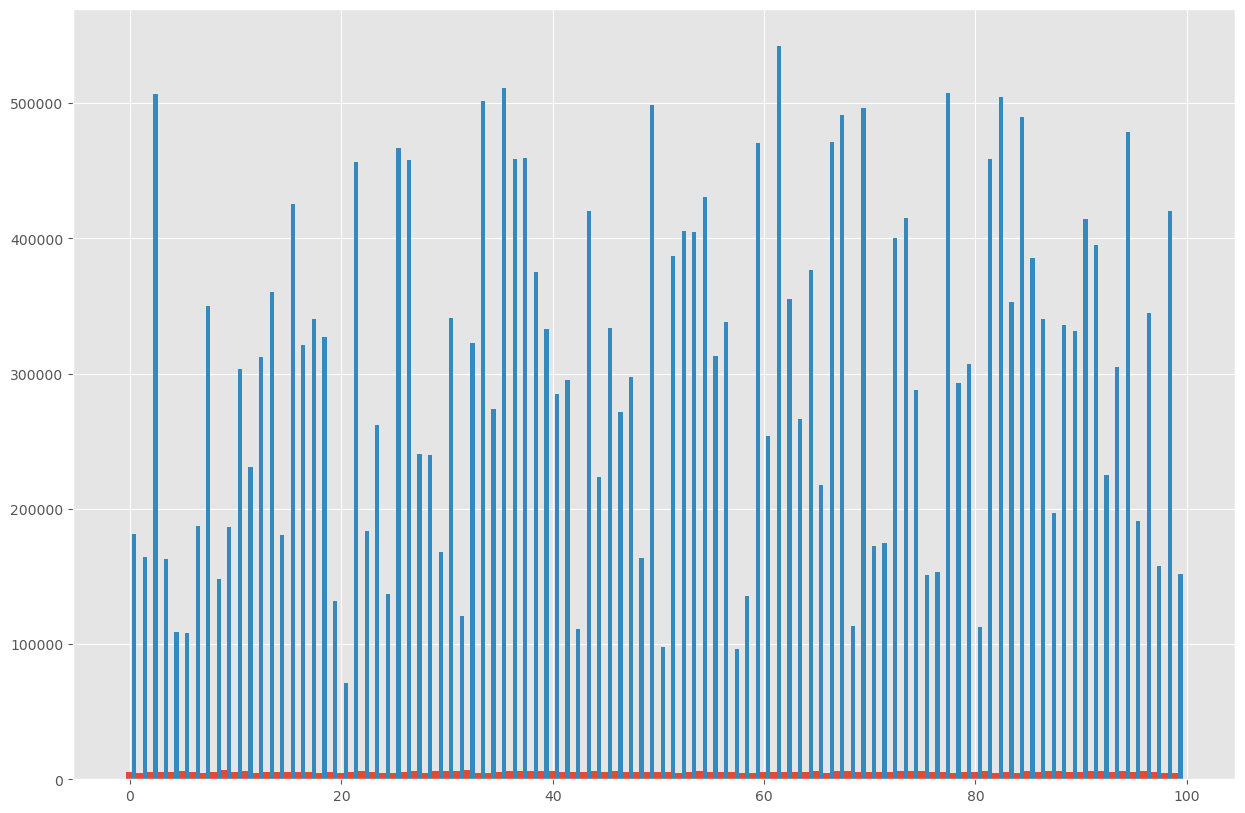

In [80]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(X_test)[:,0])
ind = np.arange(100)
width = 0.4
plt.figure(figsize=(15,10))
plt.bar(ind,y_pred, label='Predict Car Price')
plt.bar(ind + width ,y_true, width,label='Actual Car Price')